<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

In [115]:
# следующая строчка подключает сертификат для защищенного соединения
#ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [116]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\Sony\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sony\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


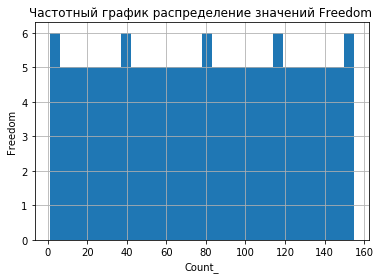

In [117]:
plt.hist(df['Freedom'], bins =30)
plt.xlabel('Count_')
plt.ylabel('Freedom')
plt.title('Частотный график распределение значений Freedom ')
plt.grid(True)
plt.show()

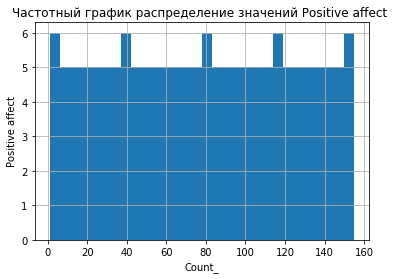

In [118]:
plt.hist(df['Positive affect'], bins =30)
plt.xlabel('Count_')
plt.ylabel('Positive affect')
plt.title('Частотный график распределение значений Positive affect ')
plt.grid(True)
plt.show()

#Ответ 1
В обоих случаях распределение не является нормальным. 
Распредение имеет тенденцию к равномерному


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [9]:
freedom = df['Freedom']


In [10]:
#медиана
statistics.median(freedom)

71.0

In [12]:
#мода
#statistics.mode(freedom)

Почему нельзя найти моду?

Моду нельзя найти, тк в нашем наборе данных  156 значений одинаково часто встречаются.

In [49]:
# проверка на выбросы 1
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


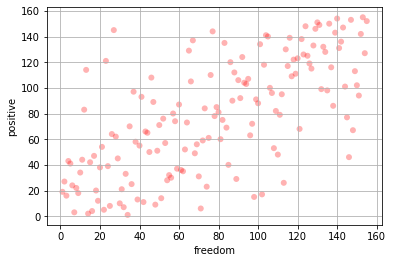

In [120]:
#проверка на выбросы 2. Визуально, кроме id28 , выбросов нет
duration = df['Freedom']
year = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive')
plt.show()

In [50]:
#математическое ожидание
df.dropna(subset = ['Freedom' ], inplace= True)
freedom=df.Freedom.astype('int64')
statistics.mean(freedom)

78

In [59]:
#Дисперсия
statistics.pvariance(freedom), "Дисперсия"

(2002, 'Дисперсия')

In [53]:
#min, max
print (max(freedom), 'Максимальное') 
print (min(freedom), 'Минимальное')

155 Максимальное
1 Минимальное


In [60]:
statistics.pstdev(freedom), "Стандартное отклонение"

(44.74371464239419, 'Стандартное отклонение')

In [61]:
duration_range = max(freedom) - min(freedom)
print(duration_range, 'Размах')

154


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

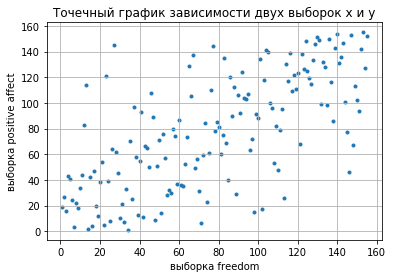

In [72]:
#Корреляция
positive_affect = df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [74]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601656


In [ ]:
#Ответ 3
Значение коэффициента Пирсона говорит о существующей, достаточно сильной прямой зависимости между показателем Свободы и количеством положительных эмоций.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [75]:
#Центрирование
print(statistics.mean(freedom))

78


In [77]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0


In [78]:
#масштабирование
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


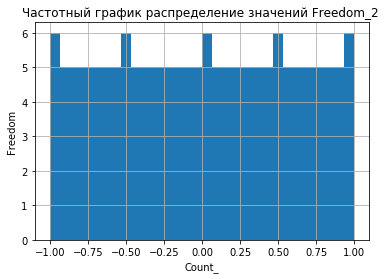

In [79]:
plt.hist(freedom_2, bins =30)
plt.xlabel('Count_')
plt.ylabel('Freedom')
plt.title('Частотный график распределение значений Freedom_2 ')
plt.grid(True)
plt.show()

Построить матрицу корреляций для всех колонок таблицы

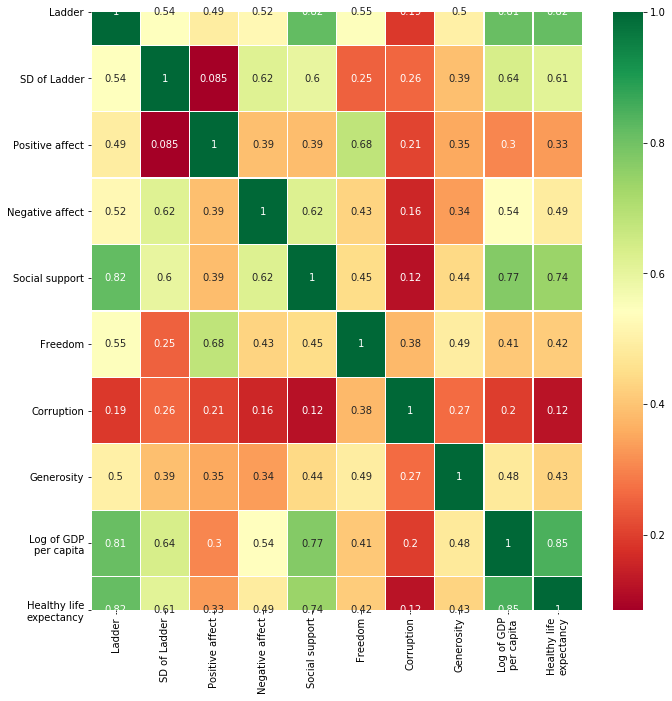

In [81]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(11,11)
plt.show()

Загрузить таблицу цен на авокадо: 

In [83]:
import io
import requests
#url="http://yustiks.ru/avocado.csv"
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

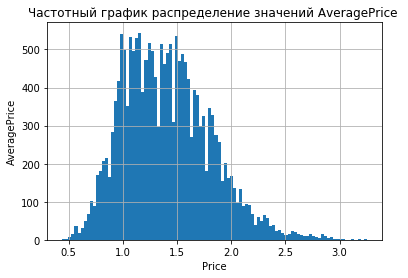

In [88]:
plt.hist(df['AveragePrice'], bins =100)
plt.xlabel('Price')
plt.ylabel('AveragePrice')
plt.title('Частотный график распределение значений AveragePrice ')
plt.grid(True)
plt.show()



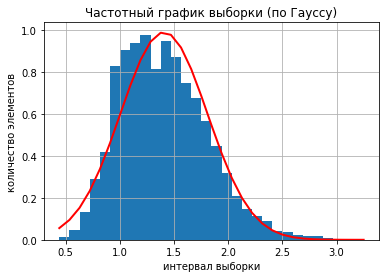

In [90]:

s = df['AveragePrice']
mu= statistics.mean(df['AveragePrice'])
sigma = statistics.pstdev(df['AveragePrice']) 
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки (по Гауссу)')
plt.grid(True)
plt.show()
#Данное распределение является нормальным 

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [110]:
a = df['4046']
b = df['4225']
c = df ['4770'

In [106]:
corr_a, p_value = pearsonr(a, df["AveragePrice"])
print(corr_a, 'с группой 4046')

-0.20831704848788404 с группой 4046


In [109]:
corr_b, p_value = pearsonr(b, df["AveragePrice"])
corr_c, p_value = pearsonr(c, df["AveragePrice"])
print(corr_b, 'с группой 4225')
print(corr_c, 'c группой 4770')

-0.17292777250933516 с группой 4225
-0.17944598397975564 c группой 4770


#Ответ
Между всеми видами авокадо и средней ценой существует слабая отрицательная корреляция, т.е. при увеличении количества авокадо незначительно снижается цена на них.